Date
2010-06-29     100.000000
2010-06-30      99.748851
2010-07-01      91.921305
2010-07-02      80.368360
2010-07-06      67.434077
2010-07-07      66.136461
2010-07-08      73.084971
2010-07-09      72.833822
2010-07-12      71.368772
2010-07-13      75.931351
2010-07-14      83.047303
2010-07-15      83.256592
2010-07-16      86.395981
2010-07-19      91.712015
2010-07-20      84.972791
2010-07-21      84.637923
2010-07-22      87.902890
2010-07-23      89.116791
2010-07-26      87.693601
2010-07-27      86.019254
2010-07-28      86.730849
2010-07-29      85.182088
2010-07-30      83.465890
2010-08-02      87.568023
2010-08-03      91.879453
2010-08-04      88.991213
2010-08-05      85.600675
2010-08-06      82.000840
2010-08-09      82.042699
2010-08-10      79.656765
                 ...     
2019-02-21    1219.045703
2019-02-22    1233.612386
2019-02-25    1250.606934
2019-02-26    1246.797794
2019-02-27    1317.454995
2019-02-28    1338.970335
2019-03-01    1233.947326
2019-03

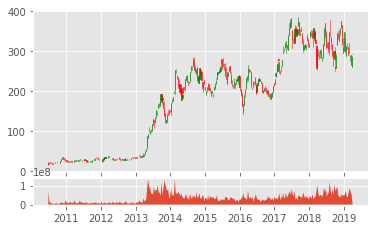

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CC

<module 'ipywidgets' from '/anaconda3/lib/python3.7/site-packages/ipywidgets/__init__.py'>

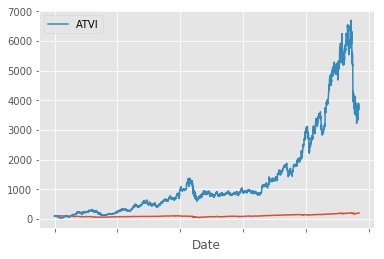

In [22]:
# %load Dataproject.py
#First pass
"""
write this in the Terminal:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

And this:
conda install -c anaconda pandas-datareader

When asked:
The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda
  qt                                              pkgs/main --> anaconda
Proceed ([y]/n)?

Press y
"""
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader as web
import numpy as np
import bs4 as bs
import pickle
import requests
import os
import pickle
import numpy as np
from scipy.stats import norm # normal distribution
import matplotlib.pyplot as plt
import ipywidgets as widgets
style.use("ggplot")


#Tesla
start = dt.datetime(2000,1,1)
end = (2016,12,31)

Stock = web.DataReader("TSLA", data_source = "yahoo", start="1/1/2010")
df_helper = Stock["Adj Close"]
df_index = df_helper.div(df_helper[0])*100


print(df_index)

#Tesla.to_excel("TSLA.xls") #Laver en Excel fil
Stock.to_csv("Stock.csv")

#Indlæs en csv fil, og lav datetime index
csv = pd.read_csv("Stock.csv", parse_dates=True, index_col=0)
csv.head(100) #Helt det samme som før, bare en anden metode

csv['Adj Close'].plot()
csv['Open'].plot()

print(csv[["Open", "High"]].head(20))

csv["100ma"] = csv["Adj Close"].rolling(window=100, min_periods=0).mean()    #100 moving average - pris idag, og 99 forrige priser.

csv.head(10)
csv.tail(10)

#Multiple plots

ax1 = plt.subplot2grid((6,1), (0,0), rowspan= 5, colspan=1)  #6 rows, 1 column. Starts at (0,0) and spans over|
ax2 = plt.subplot2grid((6,1), (5,0), rowspan= 5, colspan=1, sharex = ax1)

ax1.plot(csv.index, csv["Adj Close"])
ax1.plot(csv.index, csv["100ma"])
ax2.plot(csv.index, csv["Volume"])

#Resampling data
Stock_ohlc = csv["Adj Close"].resample("10D").ohlc() #Ohlc = Open, high, low, close. 10D = 10 days
Stock_volume = csv["Volume"].resample("10D").sum()

Stock_ohlc.head()

Stock_ohlc.reset_index(inplace=True)

#Convert to mdates and candlestick
Stock_ohlc = csv["Adj Close"].resample("10D").ohlc() #Ohlc = Open, high, low, close. 10D = 10 days
Stock_volume = csv["Volume"].resample("10D").sum()
Stock_ohlc.reset_index(inplace=True)

Stock_ohlc["Date"] = Stock_ohlc["Date"].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan= 5, colspan=1)  
ax2 = plt.subplot2grid((6,1), (5,0), rowspan= 5, colspan=1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,Stock_ohlc.values, width=2, colorup="g")
ax2.fill_between(Stock_volume.index.map(mdates.date2num), Stock_volume.values, 0)
plt.show() #Candlestick and volume on the lower graph


#Automating S&P500 - From Yahoo Finance - Close price adjusted for splits, and Adj. Close price is adjusted for both dividends and splits.
def save_sp500_tickers():
    resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find("table", {"class": "wikitable sortable"})
    tickers = []
    for row in table.findAll("tr")[1:]:
        ticker = row.findAll("td")[1].text.replace(".","-")
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    
        print(tickers)

        return(tickers)
    

save_sp500_tickers()


# def save_sp500_names():
#     resp_names = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#     soup_names = bs.BeautifulSoup(resp_names.text, "lxml")
#     table_names = soup_names.find("table", {"class": "wikitable sortable"})
#     names = []
#     for row in table_names.findAll('tr')[1:]:
#         name = row.findAll('td')[0].text.replace('.','-')
#         names.append(name)
#         df_names = pd.DataFrame(names)
#         df_names.to_csv("sp500names.csv")
        
#     with open("sp500names.pickle", "wb") as n:
#         pickle.dump(names, n)
    
#         print(names)

#         return(names)
    
# save_sp500_names()

# df_names = pd.read_csv("sp500names.csv")

# def sp500_GICS_sectors():
#     resp_gics = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#     soup_gics = bs.BeautifulSoup(resp_gics.text, "lxml")
#     table_gics = soup_gics.find("table", {"class": "wikitable sortable"})
#     gics_sectors = []
#     for row in table_gics.findAll("tr")[1:]:
#         gics_sector = row.findAll("td")[3].text.replace(".","-")
#         gics_sectors.append(gics_sector)
#         df_sectors = pd.DataFrame(gics_sectors)
#         df_sectors.to_csv("sp500sectors.csv")

#     with open("sp500GICS.pickle","wb") as g:
#         pickle.dump(gics_sectors, g)

#         print(gics_sectors)

#         return(gics_sectors)

# sp500_GICS_sectors()

# df_sectors = pd.read_csv("sp500sectors.csv")

#Getting data from Yahoo
def data_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

data_yahoo()


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    #Iterating though all DFs

    for count, ticker in enumerate(tickers):
        df = pd.read_csv("stock_dfs/{}.csv".format(ticker))
        df.set_index("Date", inplace=True)
        df.rename(columns = {"Adj Close": ticker}, inplace=True) #Adj Close takes the categories place in the column - Simple rename
        df.drop(["Open","High","Low","Close","Volume"],1, inplace=True)
        df = df.divide(df.iloc[0])*100

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how="outer")
        
        if count % 10 == 0: #Only print #10, #20, #30, etc.
            print(count)
    print(main_df.head())
    main_df.to_csv("sp500_joined_adj_closes.csv")

compile_data()

df_stocks = pd.read_csv("sp500_joined_adj_closes.csv")
df_stocks.set_index("Date", inplace=True)

print(df_stocks)

#Get sp500 index data

Index_data = web.DataReader("^GSPC", data_source="yahoo", start="1,1,2000")
Index_data.to_csv("IndexData.csv")

df_index_data = pd.read_csv("IndexData.csv", parse_dates=True)
df_index_data.set_index("Date", inplace=True)
df_index_data.rename(columns = {"Adj Close": "S&P500"}, inplace=True)

df_index_data_new = df_index_data["S&P500"]
print(df_index_data_new)

df_index_data_new = df_index_data_new/df_index_data_new[0]*100
print(df_index_data_new)
df_index_data_new.plot()

df_final = df_stocks.join(df_index_data_new, how="left")
print(df_final)

#Widget/plot

with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)


df_final["ATVI"].plot(legend=True)



# Ticker = widgets.textbox(
#     description = "Ticker:", 
#     value = "Firms", 
#     options=tickers.unique().tolist()
# )

# def validate():
#     if Ticker.value in df_final.unique():
#         return True
#     else:
#         return False

# trace1 = go.plot(x=df_final(tickers), opacity = 1, name = tickers)

# def response(change):


widgets






# def Figure_hist_Pct_Change(column = tickers):

#     df_AdjClosed = pd.read_csv("sp500_joined_adj_closes.csv")
#     df_AdjClosed.set_index('Date', inplace=True)
#     df_AdjClosed = df_AdjClosed.pct_change()

#     with open("sp500tickers.pickle", "rb") as f:
#         tickers = pickle.load(f)

# Figure_hist_Pct_Change()


In [20]:
# %load Dataproject.py
#First pass
"""
write this in the Terminal:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

And this:
conda install -c anaconda pandas-datareader

When asked:
The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda
  qt                                              pkgs/main --> anaconda
Proceed ([y]/n)?

Press y
"""
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader as web
import numpy as np
import bs4 as bs
import pickle
import requests
import os
import pickle
import numpy as np
from scipy.stats import norm # normal distribution
import matplotlib.pyplot as plt
import ipywidgets as widgets
style.use("ggplot")


#Tesla
start = dt.datetime(2000,1,1)
end = (2016,12,31)

Stock = web.DataReader("TSLA", data_source = "yahoo", start="1/1/2010")
df_helper = Stock["Adj Close"]
df_index = df_helper.div(df_helper[0])*100


print(df_index)

#Tesla.to_excel("TSLA.xls") #Laver en Excel fil
Stock.to_csv("Stock.csv")

#Indlæs en csv fil, og lav datetime index
csv = pd.read_csv("Stock.csv", parse_dates=True, index_col=0)
csv.head(100) #Helt det samme som før, bare en anden metode

csv['Adj Close'].plot()
csv['Open'].plot()

print(csv[["Open", "High"]].head(20))

csv["100ma"] = csv["Adj Close"].rolling(window=100, min_periods=0).mean()    #100 moving average - pris idag, og 99 forrige priser.

csv.head(10)
csv.tail(10)

#Multiple plots

ax1 = plt.subplot2grid((6,1), (0,0), rowspan= 5, colspan=1)  #6 rows, 1 column. Starts at (0,0) and spans over|
ax2 = plt.subplot2grid((6,1), (5,0), rowspan= 5, colspan=1, sharex = ax1)

ax1.plot(csv.index, csv["Adj Close"])
ax1.plot(csv.index, csv["100ma"])
ax2.plot(csv.index, csv["Volume"])

#Resampling data
Stock_ohlc = csv["Adj Close"].resample("10D").ohlc() #Ohlc = Open, high, low, close. 10D = 10 days
Stock_volume = csv["Volume"].resample("10D").sum()

Stock_ohlc.head()

Stock_ohlc.reset_index(inplace=True)

#Convert to mdates and candlestick
Stock_ohlc = csv["Adj Close"].resample("10D").ohlc() #Ohlc = Open, high, low, close. 10D = 10 days
Stock_volume = csv["Volume"].resample("10D").sum()
Stock_ohlc.reset_index(inplace=True)

Stock_ohlc["Date"] = Stock_ohlc["Date"].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan= 5, colspan=1)  
ax2 = plt.subplot2grid((6,1), (5,0), rowspan= 5, colspan=1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,Stock_ohlc.values, width=2, colorup="g")
ax2.fill_between(Stock_volume.index.map(mdates.date2num), Stock_volume.values, 0)
plt.show() #Candlestick and volume on the lower graph


#Automating S&P500 - From Yahoo Finance - Close price adjusted for splits, and Adj. Close price is adjusted for both dividends and splits.
def save_sp500_tickers():
    resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find("table", {"class": "wikitable sortable"})
    tickers = []
    for row in table.findAll("tr")[1:]:
        ticker = row.findAll("td")[1].text.replace(".","-")
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    
        print(tickers)

        return(tickers)
    

save_sp500_tickers()


# def save_sp500_names():
#     resp_names = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#     soup_names = bs.BeautifulSoup(resp_names.text, "lxml")
#     table_names = soup_names.find("table", {"class": "wikitable sortable"})
#     names = []
#     for row in table_names.findAll('tr')[1:]:
#         name = row.findAll('td')[0].text.replace('.','-')
#         names.append(name)
#         df_names = pd.DataFrame(names)
#         df_names.to_csv("sp500names.csv")
        
#     with open("sp500names.pickle", "wb") as n:
#         pickle.dump(names, n)
    
#         print(names)

#         return(names)
    
# save_sp500_names()

# df_names = pd.read_csv("sp500names.csv")

# def sp500_GICS_sectors():
#     resp_gics = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#     soup_gics = bs.BeautifulSoup(resp_gics.text, "lxml")
#     table_gics = soup_gics.find("table", {"class": "wikitable sortable"})
#     gics_sectors = []
#     for row in table_gics.findAll("tr")[1:]:
#         gics_sector = row.findAll("td")[3].text.replace(".","-")
#         gics_sectors.append(gics_sector)
#         df_sectors = pd.DataFrame(gics_sectors)
#         df_sectors.to_csv("sp500sectors.csv")

#     with open("sp500GICS.pickle","wb") as g:
#         pickle.dump(gics_sectors, g)

#         print(gics_sectors)

#         return(gics_sectors)

# sp500_GICS_sectors()

# df_sectors = pd.read_csv("sp500sectors.csv")

#Getting data from Yahoo
def data_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

data_yahoo()


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    #Iterating though all DFs

    for count, ticker in enumerate(tickers):
        df = pd.read_csv("stock_dfs/{}.csv".format(ticker))
        df.set_index("Date", inplace=True)
        df.rename(columns = {"Adj Close": ticker}, inplace=True) #Adj Close takes the categories place in the column - Simple rename
        df.drop(["Open","High","Low","Close","Volume"],1, inplace=True)
        df = df.divide(df.iloc[0])*100

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how="outer")
        
        if count % 10 == 0: #Only print #10, #20, #30, etc.
            print(count)
    print(main_df.head())
    main_df.to_csv("sp500_joined_adj_closes.csv")

compile_data()

df_stocks = pd.read_csv("sp500_joined_adj_closes.csv")
df_stocks.set_index("Date", inplace=True)

print(df_stocks)

#Get sp500 index data

Index_data = web.DataReader("^GSPC", data_source="yahoo", start="1,1,2000")
Index_data.to_csv("IndexData.csv")

df_index_data = pd.read_csv("IndexData.csv", parse_dates=True)
df_index_data.set_index("Date", inplace=True)
df_index_data.rename(columns = {"Adj Close": "S&P500"}, inplace=True)

df_index_data_new = df_index_data["S&P500"]
print(df_index_data_new)

df_index_data_new = df_index_data_new/df_index_data_new[0]*100
print(df_index_data_new)
df_index_data_new.plot()

df_final = df_stocks.join(df_index_data_new, how="left")
print(df_final)

#Widget/plot

with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)


df_final["ATVI"].plot(legend=True)



# Ticker = widgets.textbox(
#     description = "Ticker:", 
#     value = "Firms", 
#     options=tickers.unique().tolist()
# )

# def validate():
#     if Ticker.value in df_final.unique():
#         return True
#     else:
#         return False

# trace1 = go.plot(x=df_final(tickers), opacity = 1, name = tickers)

# def response(change):


widgets






# def Figure_hist_Pct_Change(column = tickers):

#     df_AdjClosed = pd.read_csv("sp500_joined_adj_closes.csv")
#     df_AdjClosed.set_index('Date', inplace=True)
#     df_AdjClosed = df_AdjClosed.pct_change()

#     with open("sp500tickers.pickle", "rb") as f:
#         tickers = pickle.load(f)

# Figure_hist_Pct_Change()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CC

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME